In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("ggplot")

读入数据

In [2]:
vehicles=pd.read_csv("vehicles.csv")

d:\Anaconda2\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23,70,71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
column_names=vehicles.columns.values
column_names[[22,23,70,71,72,73]]

array(['cylinders', 'displ', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode'],
      dtype=object)

In [4]:
!type varlabels.txt

atvtype - type of alternative fuel or advanced technology vehicle
barrels08 - annual petroleum consumption in barrels for fuelType1 (1)
barrelsA08 - annual petroleum consumption in barrels for fuelType2 (1)
charge120 - time to charge an electric vehicle in hours at 120 V
charge240 - time to charge an electric vehicle in hours at 240 V
city08 - city MPG for fuelType1 (2)
city08U - unrounded city MPG for fuelType1 (2), (3)
cityA08 - city MPG for fuelType2 (2)
cityA08U - unrounded city MPG for fuelType2 (2), (3)
cityCD - city gasoline consumption (gallons/100 miles) in charge depleting mode (4)
cityE - city electricity consumption in kw-hrs/100 miles
cityUF - EPA city utility factor (share of electricity) for PHEV
co2 - tailpipe CO2 in grams/mile for fuelType1 (5)
co2A - tailpipe CO2 in grams/mile for fuelType2 (5)
co2TailpipeAGpm - tailpipe CO2 in grams/mile for fuelType2 (5)
co2TailpipeGpm- tailpipe CO2 in grams/mile for fuelType1 (5)
comb08 - combined MPG for fuelType1 (2)
comb08U - un

查看基本统计信息

In [5]:
vehicles.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend
count,34287.000000,34287.000000,34287.0,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,...,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000,34287.000000
mean,17.812380,0.200444,0.0,0.006986,17.524834,2.128269,0.400968,0.185282,0.000031,0.085709,...,0.085864,0.008904,0.078820,0.007980,22.004447,0.485748,32.836272,0.737956,1998.435588,-2943.316709
std,4.512742,1.107286,0.0,0.214384,5.487468,6.923200,2.730413,2.219360,0.003274,2.108530,...,3.323446,0.516695,3.184268,0.474381,7.643661,3.600778,8.938096,4.644600,9.530667,3449.664870
min,0.059892,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1984.000000,-28250.000000
25%,14.964294,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,26.923100,0.000000,1990.000000,-4500.000000
50%,17.337486,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,32.100000,0.000000,1999.000000,-3000.000000
75%,20.589638,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.800000,0.000000,37.303100,0.000000,2007.000000,-500.000000
max,47.068308,8.320004,0.0,12.000000,138.000000,138.304000,124.000000,124.013200,0.350000,122.000000,...,262.700000,39.919600,266.800000,36.302000,197.577100,177.161700,156.000000,150.093500,2014.000000,8250.000000


查看数据集规模

In [6]:
vehicles.shape

(34287, 74)

In [7]:
vehicles.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode
0,15.689436,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,-1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.950562,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,-11500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.195570,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,1750,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.950562,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,-11500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.337486,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,-3500,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN


查看有多少年份的数据

In [8]:
vehicles["year"].unique().shape[0]

31

年份最小值和最大值

In [9]:
print(vehicles["year"].min())
print(vehicles["year"].max())

1984
2014


汽车最主要的燃料类型是？

In [10]:
vehicles["fuelType1"].value_counts()

Regular Gasoline     24587
Premium Gasoline      8521
Diesel                1025
Natural Gas             57
Electricity             56
Midgrade Gasoline       41
Name: fuelType1, dtype: int64

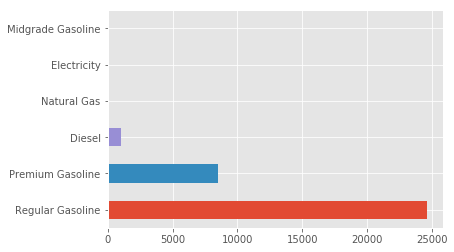

In [13]:
vehicles["fuelType1"].value_counts().plot.barh()

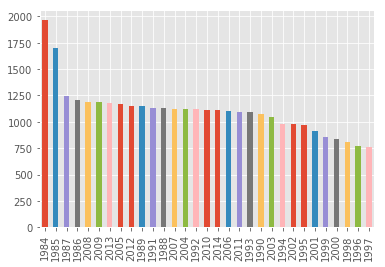

In [12]:
vehicles["year"].value_counts().plot.bar()

查看变速箱种类,具体分类太细了，我们只想知道手动和自动的分类信息

In [14]:
vehicles["trany"].value_counts()

Automatic 4-spd                     11029
Manual 5-spd                         8213
Automatic 3-spd                      3151
Automatic 5-spd                      2149
Manual 6-spd                         2009
Automatic (S6)                       1877
Manual 4-spd                         1483
Automatic 6-spd                      1093
Automatic (S5)                        813
Automatic (variable gear ratios)      534
Automatic 7-spd                       493
Automatic (S8)                        366
Automatic (S4)                        231
Automatic (S7)                        182
Auto(AM-S7)                            84
Auto(AV-S6)                            80
Automatic 8-spd                        78
Manual 3-spd                           77
Auto(AM6)                              68
Auto(AM7)                              58
Automatic (A1)                         41
Auto(AM-S6)                            38
Manual 7-spd                           24
Auto(AV-S7)                       

用trany字段的前四位创建新的字段，绘制饼图，可见数据中自动挡的比例为65.5%，手动挡的比例为34.5%

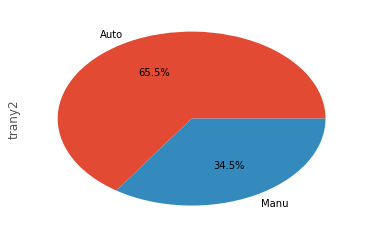

In [41]:
vehicles["trany2"]=vehicles["trany"].str[0:4]
vehicles["trany2"].value_counts().plot.pie(autopct='%1.1f%%')

In [52]:
averaged=vehicles.groupby("year")['comb08','highway08','city08'].agg(np.mean)
averaged.columns=["comb08_mean","highway08_mean","city08_mean"]
averaged["year"]=averaged.index

显示每年中平均每加仑行驶的里程数的变化趋势

(18, 24)

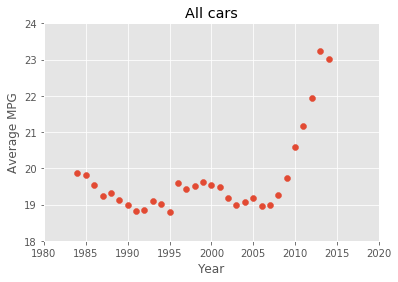

In [57]:
plt.scatter(averaged["year"],averaged["comb08_mean"])
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.title("All cars")
plt.xlim(1980,2020)
plt.ylim(18,24)

如果我们想去掉其中的混合动力车的因素，则满足三个条件，fuelType1为Regular Gasoline、Premium Gasoline、Midgrade Gasoline中的一种，fuelType2为空，atvType不是Hybird

In [75]:
criteria1=vehicles["fuelType1"].isin(["Regular Gasoline","Premium Gasoline","Midgrade Gasoline"])
criteria2=vehicles["fuelType2"].isnull()
criteria3=vehicles["atvType"] != "Hybird"
vehicles_non_hybird=vehicles[criteria1 & criteria2 & criteria3]

(18, 24)

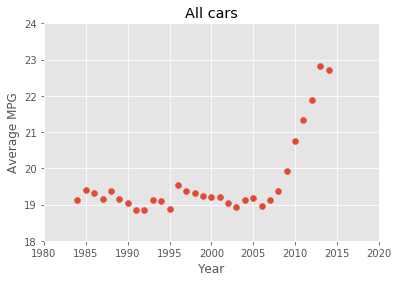

In [90]:
vehicles_non_hybird_comb_mean=vehicles_non_hybird.groupby("year")["comb08"].agg(np.mean)
plt.scatter(vehicles_non_hybird_comb_mean.index,vehicles_non_hybird_comb_mean)
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.title("All cars")
plt.xlim(1980,2020)
plt.ylim(18,24)

结论：从1984年到2014年，无论是否包含混合动力车型，平均每加仑行驶里程数有显著的上升

提出疑问：是否大引擎汽车数量的减少导致每加仑行驶里程的增加？

进一步提出疑问：大引擎汽车每加仑里程数表现比较差？

In [91]:
vehicles["displ"].describe()

count     34276
unique      124
top         2.0
freq       1530
Name: displ, dtype: object

In [92]:
vehicles["displ"].unique()

array([2.0, 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4.0, 5.0, 3.3, 3.1, 3.8,
       4.6, 3.4, 3.0, 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 6.2, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8.0, 6.0, 3.6,
       5.4, 5.6, 1.0, 2.1, 1.2, 6.5, 0.0, 2.7, 4.7, 5.5, 1.1, 5.3, 1.7,
       4.4, 3.7, 6.7, 4.8, nan, 8.3, 1.4, 6.1, 7.0, 8.4, '3.3', '3.8',
       '3.5', '4.5', '5.0', '4.6', '4.2', '5.5', '6.0', '3.0', '1.5',
       '2.0', '2.8', '2.4', '2.7', '2.3', '3.2', '2.5', '4.0', '4.7',
       '5.4', '6.2', '5.7', '4.3', '3.7', '4.8', '2.1', '2.2', '1.8',
       '6.5', '3.6', '6.1', '1.6', '1.0', '4.4', '5.9', '1.3', '6.7',
       '5.6', '3.4', '7.0', '5.2', '3.9', '5.3', '4.9', '2.9', '5.8',
       '3.1', '8.4', '1.1', '2.6', '1.7', '1.4', '6.8', '4.1', '1.9',
       '8.0', '6.3', '6.6', '-', '6.4', '1.2', '7.4'], dtype=object)

可以看出，这个字段中包含有空的数值，有字符型，有浮点型，首先进行数据处理，去掉空字段并将所有数值转化为浮点型

In [104]:
vehicles_non_hybird=vehicles.dropna(subset=["displ","comb08"])
vehicles_non_hybird=vehicles_non_hybird[vehicles_non_hybird["displ"]!="-"]
vehicles_non_hybird["displ"]=vehicles_non_hybird["displ"].astype("float")
vehicles_non_hybird["displ"].describe()

count    34229.000000
mean         3.332402
std          1.359546
min          0.000000
25%          2.200000
50%          3.000000
75%          4.300000
max          8.400000
Name: displ, dtype: float64

根据排量大小分类，计算每加仑里程数的平均值，画出散点图

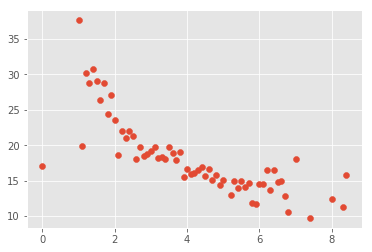

In [107]:
tmp=vehicles_non_hybird.groupby("displ")["comb08"].agg(np.mean)
plt.scatter(tmp.index,tmp)

可见，引擎排量越大，每加仑里程数越差，确定负相关性

In [120]:
from scipy.stats.stats import pearsonr
(r,p)=pearsonr(vehicles_non_hybird["displ"],vehicles_non_hybird["comb08"])
#print("the relation between displ and MPG is %f,the p_value is %f" %(r,p))
print(r)

-0.7502682053038041


从r值能够得出相同的结论，引擎排量与每加仑里程数为负相关

那么，大排量的汽车有没有减少？通过研究平均排量随着时间的变化来说明

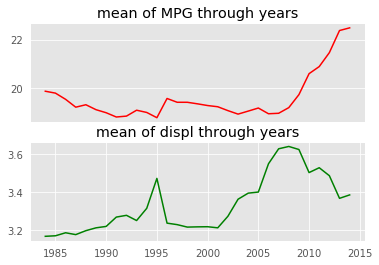

In [149]:
tmp1=vehicles_non_hybird.groupby("year")["displ"].agg(np.mean)
tmp2=vehicles_non_hybird.groupby("year")["comb08"].agg(np.mean)
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
ax1.set_title("mean of MPG through years")
ax1.set_xticks([])
ax1.plot(tmp2,c="red")
ax1.tick_params(bottom=False,left=False,top=False,right=False)
ax2.set_title("mean of displ through years")
ax2.plot(tmp1,c="green")
ax2.tick_params(bottom=False,left=False,top=False,right=False)

结论：随着时间的变化，平均排量大小从2008年开始一路走低，说明大排量汽车开始减少，而每加仑平均里程数一路升高，说明每加仑平均里程数的提升有一部分原因得益于大排量汽车的减少

四缸引擎汽车在美国市场出现各品牌和型号的频次

In [155]:
vehicles_non_hybird.dropna(subset=["cylinders"],inplace=True)
vehicles_non_hybird["cylinders"]=vehicles_non_hybird["cylinders"].astype("float")
vehicles_non_hybird["cylinders"].unique()

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16.])

计算每年4缸汽车的品牌数量

In [160]:
vehicles_non_hybird_4=vehicles_non_hybird[vehicles_non_hybird["cylinders"]==4]
grouped_by_year_4_cylinder=vehicles_non_hybird_4.groupby("year")["make"].nunique()

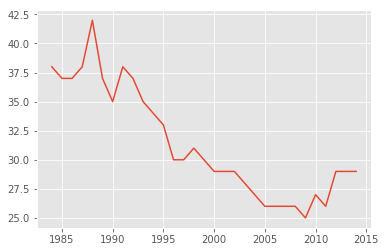

In [164]:
plt.plot(grouped_by_year_4_cylinder)

结论：生产4缸引擎汽车的品牌数整体上在减少

提出疑问：汽车的品牌总数是否同时在减少呢？

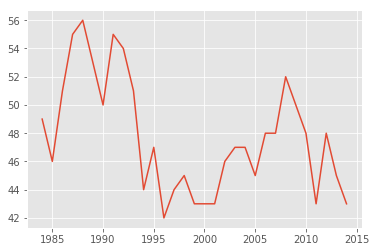

In [166]:
plt.plot(vehicles_non_hybird.groupby("year")["make"].nunique())

筛选出一直在生产4缸引擎汽车的厂家

In [174]:
from functools import reduce
grouped_by_year_4_cylinder=vehicles_non_hybird_4.groupby("year")
unique_makes=[]
for k,v in grouped_by_year_4_cylinder:
    unique_makes.append(set(v["make"].unique()))
unique_makes=reduce(set.intersection,unique_makes)
print(unique_makes)

{'Dodge', 'Ford', 'Nissan', 'Mazda', 'Honda', 'Jeep', 'GMC', 'Chrysler', 'Volkswagen', 'Subaru', 'Mitsubishi', 'Chevrolet', 'Toyota'}


查看各品牌4缸汽车每加仑里程数随时间的变化

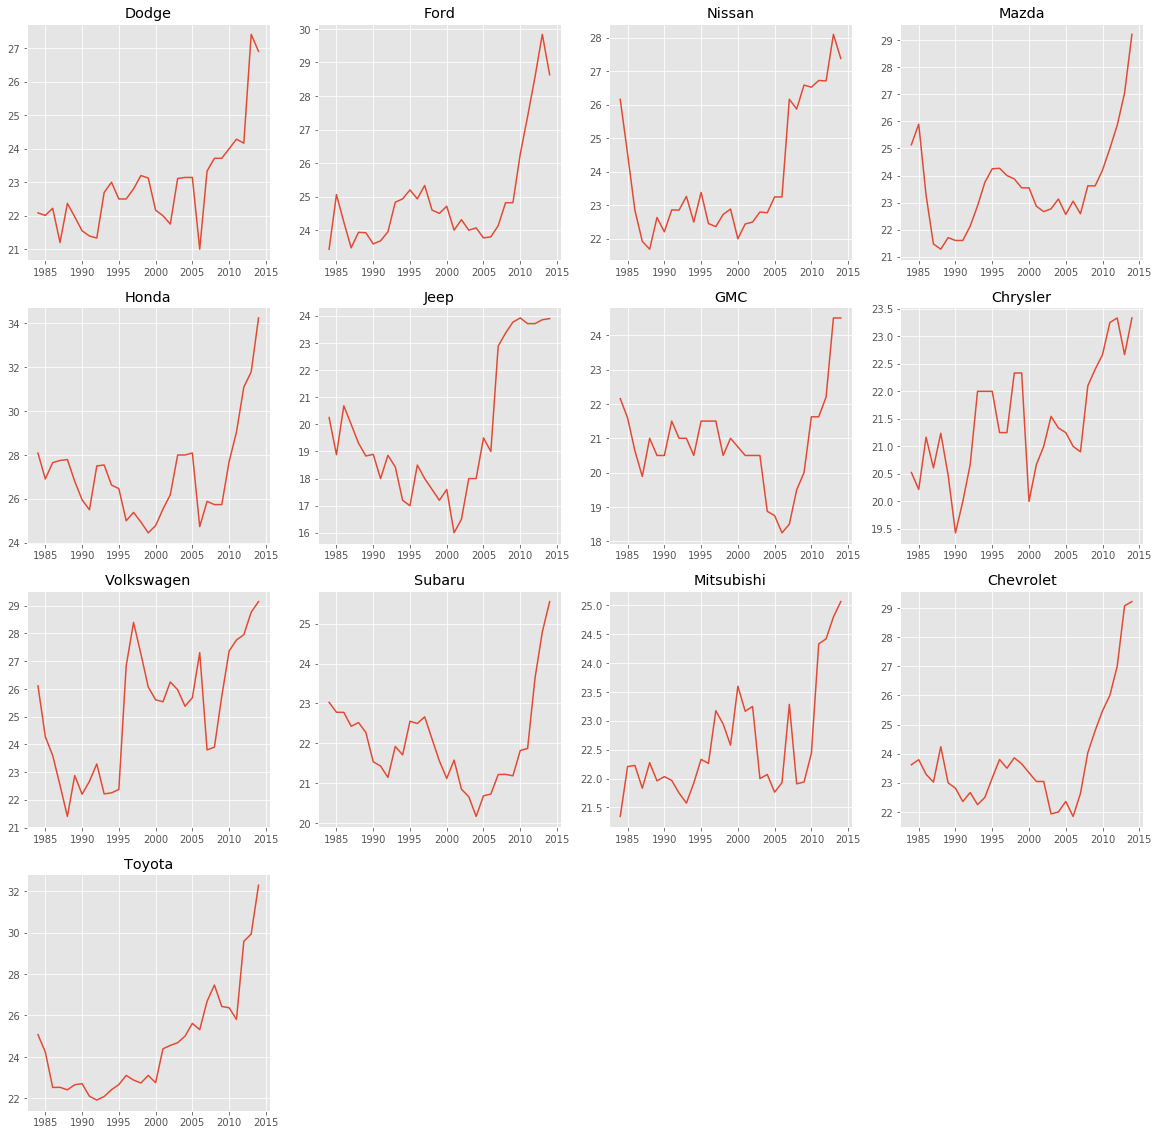

In [216]:
l=list(unique_makes)
# print(l)
# plt.plot(vehicles_non_hybird_4[vehicles_non_hybird_4["make"]=='Honda'].groupby("year")["comb08"].agg(np.mean))
fig=plt.figure(figsize=(20,20))
for sp in range(len(l)):
    ax=fig.add_subplot(4,4,sp+1)
    ax.plot(vehicles_non_hybird_4[vehicles_non_hybird_4["make"]==l[sp]].groupby("year")["comb08"].agg(np.mean))
    ax.set_title(l[sp])

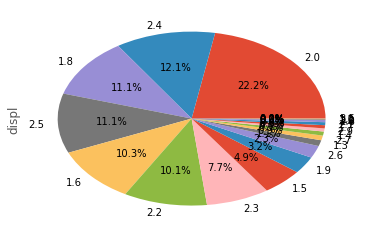

In [231]:
vehicles_non_hybird_4["displ"].value_counts().plot.pie(autopct="%1.1f%%")

In [232]:
vehicles_non_hybird_4["displ"].describe()

count    12970.000000
mean         2.070817
std          0.342840
min          1.000000
25%          1.800000
50%          2.000000
75%          2.400000
max          3.500000
Name: displ, dtype: float64

结论：4缸汽车的排量大部分在2.0~2.4之间